In [1]:
from collections import Counter
import json
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from Metrics import getSentiment, getQuoteBased, getSensationalized, getMudslinging, getSpin, getInformal
from NewsBiasClustering import NewsBiasClustering

In [2]:
print('Loading File')
file = open('rust-articles-backup.json', encoding='utf8')
articles = pd.DataFrame.from_dict(json.load(file))
print('File Loaded')

Loading File
File Loaded


In [3]:
def display(metrics, labels, hasNeg = False):
    # Reduce Data Dimensions
    data = pd.DataFrame(metrics,columns=['sentiment','quoteBased','sensationalized','mudslinging','spin','informal'])
    scalar = StandardScaler()
    scaled_data = pd.DataFrame(scalar.fit_transform(data),columns=['sentiment','quoteBased','sensationalized','mudslinging','spin','informal']) #scaling the data
    #sns.heatmap(scaled_data.corr())
    pca = PCA(n_components = 2)
    pca.fit(scaled_data)
    data_pca = pca.transform(scaled_data)
    data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2'])
    #sns.heatmap(data_pca.corr())

    # Output Clustered Graph
    for i in range(len(set(labels))):
        if hasNeg:
            i = i - 1
        pc1 = []
        pc2 = []
        for j in range(len(labels)):
            if labels[j] == i:
                pc1.append(data_pca.iloc[j]['PC1'])
                pc2.append(data_pca.iloc[j]['PC2'])
        plt.scatter(pc1,pc2,s=5) 
    plt.show()

In [4]:
# Get Metrics
toUse = articles[:1000]
metrics = []
for i in range(len(toUse)):
    sentiment = getSentiment(toUse.at[i,'body'])
    quoteBased = getQuoteBased(toUse.at[i,'body'])
    sensationalized = getSensationalized(toUse.at[i,'body'])
    mudslinging = getMudslinging(toUse.at[i,'body'])
    spin = getSpin(toUse.at[i,'body'])
    informal = getInformal(toUse.at[i,'body'])
    metrics.append([sentiment, quoteBased, sensationalized, mudslinging, spin, informal])

---

DBSCAN
- Non-flat geometry, uneven cluster sizes, outlier removal, transductive

Counter({1: 486, 0: 402, -1: 98, 3: 10, 2: 4})


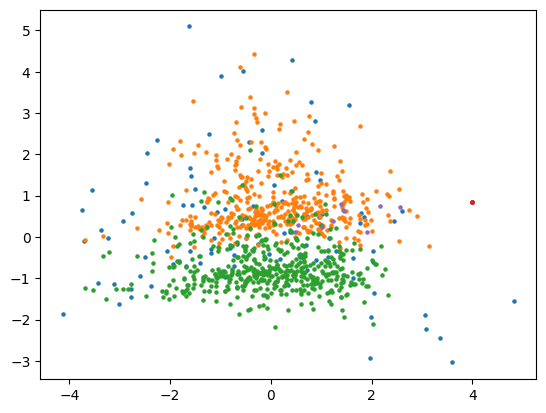

'clustering = DBSCAN(eps=0.16, min_samples=4).fit(metrics)\nlabels = clustering.labels_\nprint(Counter(labels))\ndisplay(metrics, labels, True)'

In [5]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.13, min_samples=4).fit(metrics)
labels = clustering.labels_
print(Counter(labels))
display(metrics, labels, True)

"""clustering = DBSCAN(eps=0.16, min_samples=4).fit(metrics)
labels = clustering.labels_
print(Counter(labels))
display(metrics, labels, True)"""

---

Ward Agglomerative Clustering
- Many clusters, possibly connectivity constraints, transductive

Counter({0: 567, 1: 433})


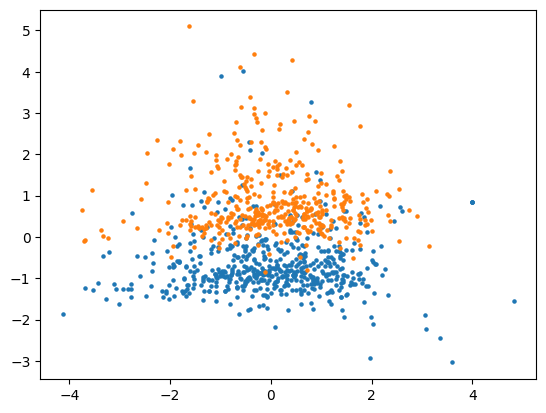

In [6]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=5.5, linkage='ward').fit(metrics)
labels = clustering.labels_
print(Counter(labels))
display(metrics, labels)

---

OPTICS
- Non-flat geometry, uneven cluster sizes, variable cluster density, outlier removal, transductive

Counter({-1: 975, 0: 14, 1: 11})


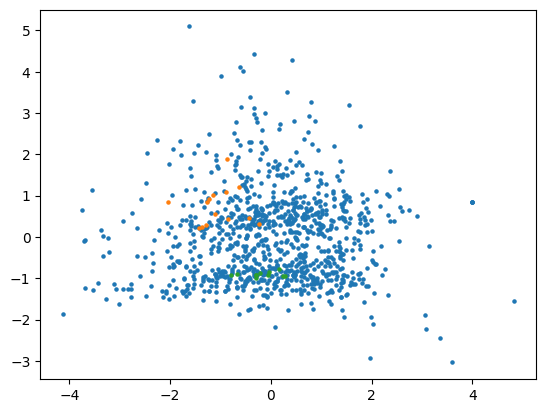

In [7]:
from sklearn.cluster import OPTICS

clustering = OPTICS(min_samples = 8).fit(metrics)
labels = clustering.labels_
print(Counter(labels))
display(metrics, labels, True)

---

BIRCH
- Large dataset, outlier removal, data reduction, inductive

Counter({1: 524, 0: 476})


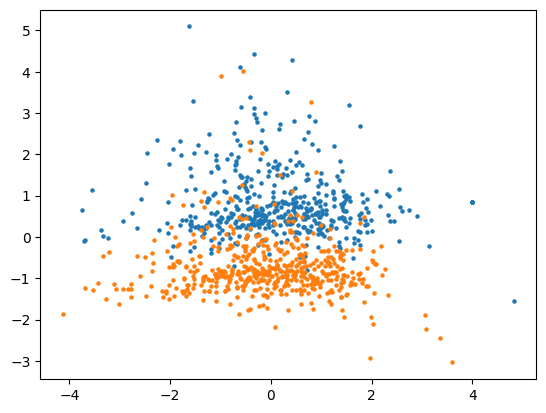

In [8]:
from sklearn.cluster import Birch

clustering = Birch(n_clusters=None, threshold=0.4).fit(metrics)
labels = clustering.labels_
print(Counter(labels))
display(metrics, labels)

---
---

News Bias Clustering
- Using Birch Clustering

Counter({1: 524, 0: 476})


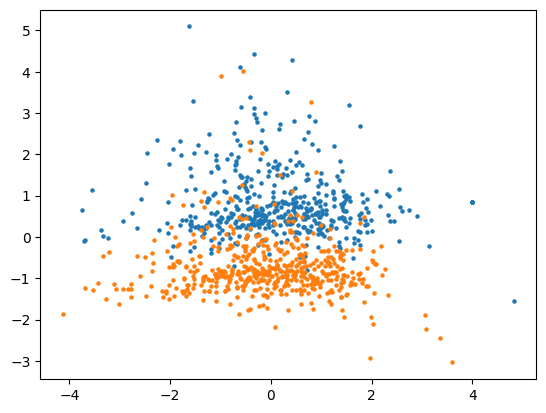

In [9]:
NewsBiasClustering(articles[:1000])